<a href="https://colab.research.google.com/github/RebeccaKessler/Machine_Learning/blob/main/Codes/Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [90]:
df_training_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/training_data.csv')
df_unlabelled_test_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/unlabelled_test_data.csv')

In [91]:
df_training_data.head(5)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [92]:
df_unlabelled_test_data.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


# Logistic Regresssion

## Train on the 80% of training data, test on 20% of training data

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Split the training dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # add shuffle=True ?

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english') # consider only single words (unigrams), remove common english stopwords
x_train_tfidf = vectorizer.fit_transform(x_train) # fit vectorizer on + transfrom train data
x_test_tfidf = vectorizer.transform(x_test) # transform test data

In [94]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred = model_LR.predict(x_test_tfidf)

df_pred_LR = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred})
df_pred_LR

,id,difficulty
0,596,A1
1,3370,B2
2,3048,C2
3,2908,B1
4,8,A2
...,...,...
955,2968,A1
956,198,C2
957,2422,C2
958,1485,C2


In [95]:
# Get the accuracy
accuracy_LR_split = accuracy_score(y_test, LR_pred)
print("Accuracy of the Logistic Regression model for split train-test dataset:", accuracy_LR_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_LR_split = precision_score(y_test, LR_pred, average='macro')
print("Precision:", precision_LR_split)

recall_LR_split = recall_score(y_test, LR_pred, average='macro')
print("Recall:", recall_LR_split)

f1_LR_split = f1_score(y_test, LR_pred, average='macro')
print("F1-score:", f1_LR_split)

Accuracy of the Logistic Regression model for split train-test dataset: 0.44583333333333336
Precision: 0.44037252365140805
Recall: 0.44431901424459186
F1-score: 0.438613907369678


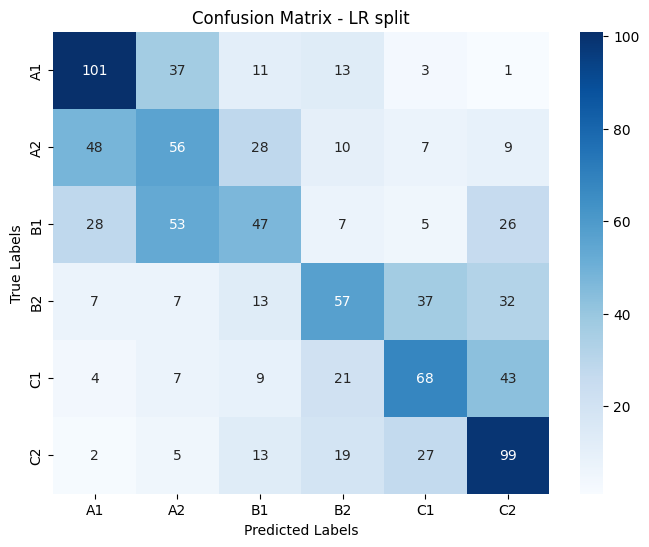

In [96]:
cm_LR_split = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR_split, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LR split')
plt.show()

## Train on the full training data, test on the unlabelled test data

In [97]:
# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Define the test data
x_test_unlabelled = df_unlabelled_test_data['sentence']

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
x_full_tfidf = vectorizer.fit_transform(x) # fit vectorizer on + transfrom train data
x_test_unlabelled_tfidf = vectorizer.transform(x_test) # transform test data


In [98]:
# Initialize and train the Logistic Regression model on the whole dataset
model_LR = LogisticRegression()
model_LR.fit(x_full_tfidf, y)

# Make predictions on the test data with the trained model
LR_pred_full = model_LR.predict(x_test_unlabelled_tfidf)

df_pred_LR_full = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred_full}) #shouldn't it be x_test_unlabelled.index?
df_pred_LR_full

,id,difficulty
0,596,A1
1,3370,A1
2,3048,C2
3,2908,B2
4,8,A2
...,...,...
955,2968,A1
956,198,C2
957,2422,B2
958,1485,C1


In [99]:
# Export the dataframe as csv
df_pred_LR_full.to_csv("submission_LR.csv", index=False)

# KNN

## Split train-test dataset

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the kNN classifier
model_kNN = KNeighborsClassifier()

model_kNN.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred = model_kNN.predict(x_test_tfidf)

df_pred_kNN = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred})
df_pred_kNN

,id,difficulty
0,596,A1
1,3370,A1
2,3048,C2
3,2908,A2
4,8,A1
...,...,...
955,2968,A1
956,198,C2
957,2422,B2
958,1485,B1


In [101]:
# Get the accuracy
accuracy_kNN_split = accuracy_score(y_test, kNN_pred)
print("Accuracy of the kNN classifier for split train-test dataset:", accuracy_kNN_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_kNN_split = precision_score(y_test, kNN_pred, average='macro')
print("Precision:", precision_kNN_split)

recall_kNN_split = recall_score(y_test, kNN_pred, average='macro')
print("Recall:", recall_kNN_split)

f1_kNN_split = f1_score(y_test, kNN_pred, average='macro')
print("F1-score:", f1_kNN_split)

Accuracy of the kNN classifier for split train-test dataset: 0.3104166666666667
Precision: 0.40073295740892934
Recall: 0.3072977707345311
F1-score: 0.2896427740867344


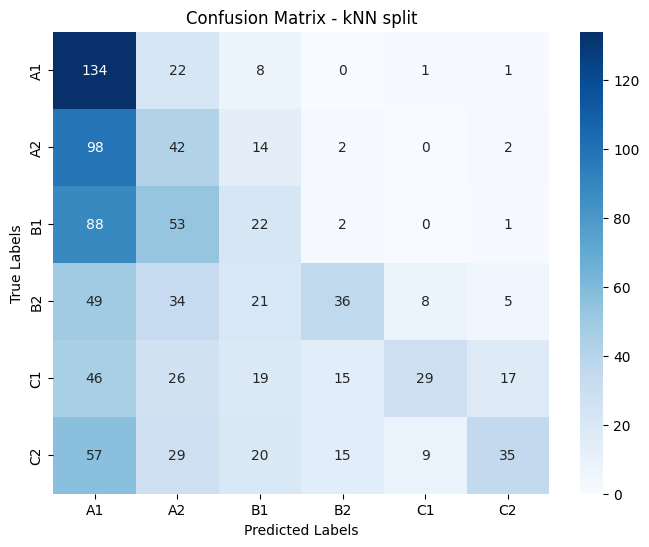

In [102]:
cm_kNN_split = confusion_matrix(y_test, kNN_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_kNN_split, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split')
plt.show()

In [103]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
n_neighbors = [1,3,5,7]
p_values = [1,2] # 1) Manhattan distance 2) Euclidian distance
weights = ['uniform', 'distance']

for w in weights:
    for p in p_values:
        for n in n_neighbors:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(x_train_tfidf, y_train)
            accuracy_kNN = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of kNN classifier for k = {n}, p = {p}, weight = {w}: {accuracy_kNN}")

Accuracy of kNN classifier for k = 1, p = 1, weight = uniform: 0.22604166666666667
Accuracy of kNN classifier for k = 3, p = 1, weight = uniform: 0.17395833333333333
Accuracy of kNN classifier for k = 5, p = 1, weight = uniform: 0.175
Accuracy of kNN classifier for k = 7, p = 1, weight = uniform: 0.17291666666666666
Accuracy of kNN classifier for k = 1, p = 2, weight = uniform: 0.3697916666666667
Accuracy of kNN classifier for k = 3, p = 2, weight = uniform: 0.28541666666666665
Accuracy of kNN classifier for k = 5, p = 2, weight = uniform: 0.3104166666666667
Accuracy of kNN classifier for k = 7, p = 2, weight = uniform: 0.303125
Accuracy of kNN classifier for k = 1, p = 1, weight = distance: 0.22604166666666667
Accuracy of kNN classifier for k = 3, p = 1, weight = distance: 0.16875
Accuracy of kNN classifier for k = 5, p = 1, weight = distance: 0.17395833333333333
Accuracy of kNN classifier for k = 7, p = 1, weight = distance: 0.17395833333333333
Accuracy of kNN classifier for k = 1, p

In [104]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with cross-validation

# Define the parameters to test
param_grid_kNN = {'n_neighbors':np.arange(1,10), 'p':np.arange(1,2), 'weights':['uniform','distance']}

# Initialize the kNN classifier, perform grid search, fit the model
model_kNN_cv = KNeighborsClassifier()
kNN_cv = GridSearchCV(model_kNN_cv, param_grid_kNN, cv=7)
kNN_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_kNN = kNN_cv.best_params_
print('The best parameters are:', best_param_kNN)


The best parameters are: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [105]:
# Initialize and train the kNN classifier with the best parameters
model_kNN_best = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred_best = model_kNN_best.predict(x_test_tfidf)

df_pred_kNN_best = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred_best})
df_pred_kNN_best

,id,difficulty
0,596,A1
1,3370,A1
2,3048,A2
3,2908,C1
4,8,A1
...,...,...
955,2968,A1
956,198,C2
957,2422,A2
958,1485,B1


In [106]:
# Get the accuracy
accuracy_kNN_split_best = accuracy_score(y_test, kNN_pred_best)
print("Accuracy of the kNN model with the best parameters, for split train-test dataset:", accuracy_kNN_split_best)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_kNN_split_best = precision_score(y_test, kNN_pred_best, average='macro')
print("Precision:", precision_kNN_split_best)

recall_kNN_split_best = recall_score(y_test, kNN_pred_best, average='macro')
print("Recall:", recall_kNN_split_best)

f1_kNN_split_best = f1_score(y_test, kNN_pred_best, average='macro')
print("F1-score:", f1_kNN_split_best)

Accuracy of the kNN model with the best parameters, for split train-test dataset: 0.3697916666666667
Precision: 0.4262340044387724
Recall: 0.36698244213760683
F1-score: 0.3598353299527997


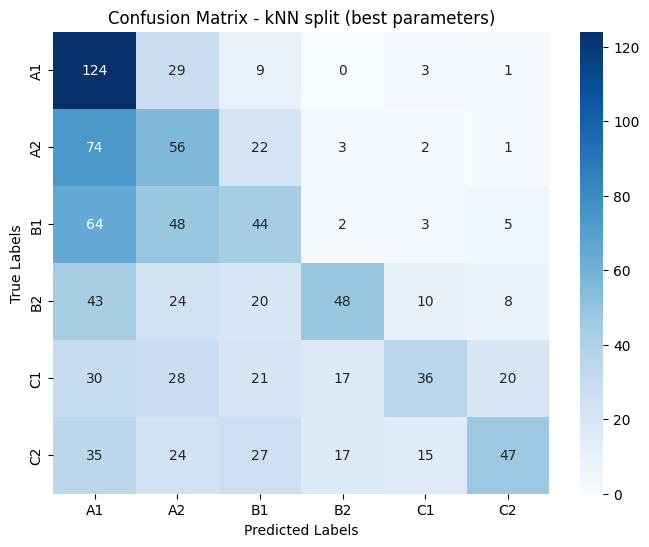

In [107]:
cm_kNN_split_best = confusion_matrix(y_test, kNN_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_kNN_split_best, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split (best parameters)')
plt.show()

## Full dataset

In [108]:
# Initialize and fit the kNN classifier on the whole dataset
model_kNN = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN.fit(x_full_tfidf, y)

# Make predictions on the test data
kNN_pred_full = model_kNN.predict(x_test_unlabelled_tfidf)

df_pred_kNN_full = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred_full}) #shouldn't it be x_test_unlabelled.index?
df_pred_kNN_full

,id,difficulty
0,596,A1
1,3370,A1
2,3048,C2
3,2908,B2
4,8,A2
...,...,...
955,2968,A2
956,198,C2
957,2422,B2
958,1485,C1


In [109]:
# Export the dataframe as csv
df_pred_kNN_full.to_csv("submission_kNN.csv", index=False)

# Decision Tree

## Split train-test dataset

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
model_DT = DecisionTreeClassifier()

model_DT.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred = model_DT.predict(x_test_tfidf)

df_pred_DT = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred})
df_pred_DT

,id,difficulty
0,596,A1
1,3370,B1
2,3048,B2
3,2908,C2
4,8,A1
...,...,...
955,2968,A2
956,198,A2
957,2422,C2
958,1485,C2


In [111]:
# Get the accuracy
accuracy_DT_split = accuracy_score(y_test, DT_pred)
print("Accuracy of the Decision Tree model for split train-test dataset:", accuracy_DT_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_DT_split = precision_score(y_test, DT_pred, average='macro')
print("Precision:", precision_DT_split)

recall_DT_split = recall_score(y_test, DT_pred, average='macro')
print("Recall:", recall_DT_split)

f1_DT_split = f1_score(y_test, DT_pred, average='macro')
print("F1-score:", f1_DT_split)

Accuracy of the Decision Tree model for split train-test dataset: 0.2989583333333333
Precision: 0.2923375374252223
Recall: 0.2976572253037718
F1-score: 0.2888226812812562


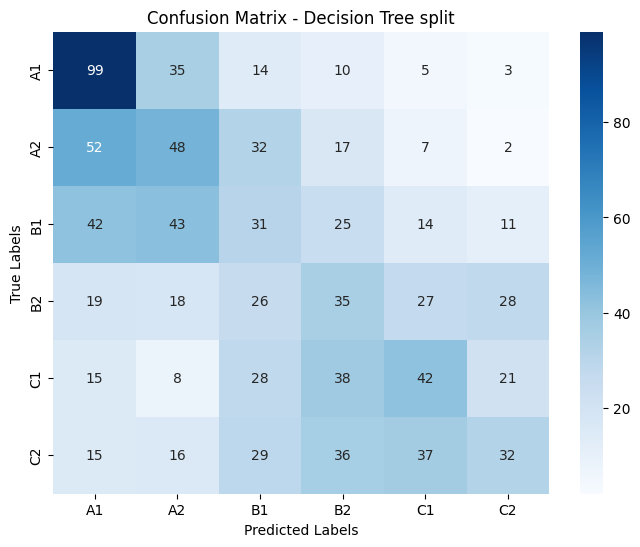

In [112]:
cm_DT_split = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT_split, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree split')
plt.show()

In [113]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5]

for d in max_depth:
    for c in criterion:
            model = DecisionTreeClassifier(criterion=c, max_depth=d)
            model.fit(x_train_tfidf, y_train)
            accuracy_DT = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of Decision Tree model for criterion = {c}, max_depth = {d}: {accuracy_DT}")

Accuracy of Decision Tree model for criterion = gini, max_depth = 1: 0.21354166666666666
Accuracy of Decision Tree model for criterion = entropy, max_depth = 1: 0.21354166666666666
Accuracy of Decision Tree model for criterion = gini, max_depth = 2: 0.2552083333333333
Accuracy of Decision Tree model for criterion = entropy, max_depth = 2: 0.25729166666666664
Accuracy of Decision Tree model for criterion = gini, max_depth = 3: 0.25729166666666664
Accuracy of Decision Tree model for criterion = entropy, max_depth = 3: 0.25416666666666665
Accuracy of Decision Tree model for criterion = gini, max_depth = 4: 0.27708333333333335
Accuracy of Decision Tree model for criterion = entropy, max_depth = 4: 0.26875
Accuracy of Decision Tree model for criterion = gini, max_depth = 5: 0.27291666666666664
Accuracy of Decision Tree model for criterion = entropy, max_depth = 5: 0.28020833333333334


In [114]:
# Find the optimal parameters with cross-validation

# Define the parameters to test
param_grid_DT = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,5)}

# Initialize the kNN classifier, perform grid search, fit the model
model_DT_cv = DecisionTreeClassifier()
DT_cv = GridSearchCV(model_DT_cv, param_grid_DT, cv=5)
DT_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_DT = DT_cv.best_params_
print('The best parameters are:', best_param_DT)

The best parameters are: {'criterion': 'entropy', 'max_depth': 4}


In [115]:
# Initialize and train the Decision Tree model with the best parameters
model_DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=5)

model_DT_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred_best = model_DT_best.predict(x_test_tfidf)

df_pred_DT_best = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred_best})
df_pred_DT_best

,id,difficulty
0,596,A1
1,3370,B1
2,3048,C2
3,2908,B2
4,8,B1
...,...,...
955,2968,B1
956,198,C2
957,2422,C2
958,1485,C2


In [116]:
# Get the accuracy
accuracy_DT_split_best = accuracy_score(y_test, DT_pred_best)
print("Accuracy of the Decision Tree model with the best parameters, for split train-test dataset:", accuracy_DT_split_best)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_DT_split_best = precision_score(y_test, DT_pred_best, average='macro')
print("Precision:", precision_DT_split_best)

recall_DT_split_best = recall_score(y_test, DT_pred_best, average='macro')
print("Recall:", recall_DT_split_best)

f1_DT_split_best = f1_score(y_test, DT_pred_best, average='macro')
print("F1-score:", f1_DT_split_best)

Accuracy of the Decision Tree model with the best parameters, for split train-test dataset: 0.28020833333333334
Precision: 0.27242743528798846
Recall: 0.27591018420576413
F1-score: 0.24497635283674266


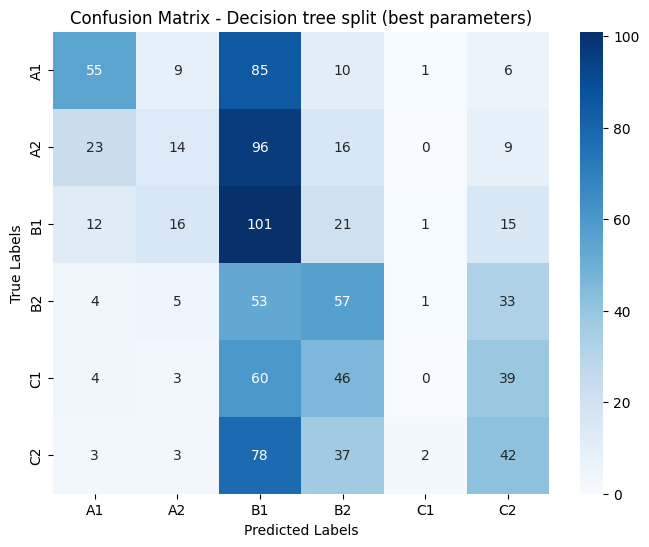

In [117]:
cm_DT_split_best = confusion_matrix(y_test, DT_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT_split_best, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision tree split (best parameters)')
plt.show()

## Full dataset

In [118]:
# Initialize and fit the kNN classifier on the whole dataset
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)

model_DT.fit(x_full_tfidf, y)

# Make predictions on the test data
DT_pred_full = model_DT.predict(x_test_unlabelled_tfidf)

df_pred_DT_full = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred_full}) #shouldn't it be x_test_unlabelled.index?
df_pred_DT_full

,id,difficulty
0,596,A1
1,3370,B1
2,3048,C2
3,2908,B2
4,8,B1
...,...,...
955,2968,B1
956,198,C1
957,2422,C1
958,1485,C1


In [119]:
# Export the dataframe as csv
df_pred_DT_full.to_csv("submission_DT.csv", index=False)

# Random Forest